<h1>Machine Learning Course Project<br>
Identify the apparels - Analytics Vidhya</h1>

Team E15<br>
Pradyna A   <br>
Vaishnavi H   <br>
Vaishnavi D  <br>
Vijaylaxmi P  <br>


Multi Class Image Classification Problem

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more . The labels are mapped from 0-9 namely:
0: T-shirt/top <br>
1: Trouser <br> 2: Pullover <br>3: Dress<br> 4: Coat <br>5: Sandal <br>6: Shirt<br> 7: Sneaker <br>8: Bag <br>9:Ankle boot<br>


Evaluation Metric : Multi-class accuracy

In [ ]:
%%capture
!pip install tensorflow-gpu

In [ ]:
!nvidia-smi

Wed Feb 24 13:50:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the train and test csv file
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical

In [ ]:
from skimage import color
from skimage import io

In [ ]:
import PIL
print('Pillow Version:', PIL.__version__)

from PIL import Image
from numpy import asarray

Pillow Version: 7.0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random

In [ ]:

from keras.callbacks import History 
history = History()
import matplotlib 
from matplotlib import pyplot

In [ ]:
%%capture
!unzip /content/drive/MyDrive/ML_Course_Project/train_LbELtWX.zip

In [ ]:
%%capture
!unzip /content/drive/MyDrive/ML_Course_Project/test_ScVgIM0.zip

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
print(f'Training dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns , namely {train_df.columns[0],train_df.columns[1]}')
print(f'Test data has {test_df.shape[0]} rows, namely {test_df.columns[0]}')

Training dataset has 60000 rows and 2 columns , namely ('id', 'label')
Test data has 10000 rows, namely id


In [ ]:
#check for null values 
print(train_df.isnull().sum()) 
print(test_df.isnull().sum()) 

id       0
label    0
dtype: int64
id    0
dtype: int64


In [ ]:
# count of each label in tarin dataset
train_df['label'].value_counts(normalize=True,ascending=True)

0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
5    0.1
6    0.1
7    0.1
8    0.1
9    0.1
Name: label, dtype: float64

Images are in RGBA format , need for coversion to gray scale<br>
Present shape of images : (28,28,4)

In [ ]:
# Reading the train images
train_X = []
for img_name in train_df['id']:     
    img = color.rgb2gray(io.imread('train/' + str(img_name)+'.png')) # convert image shape to (28,28,1) and pixel values are between 0 and 1
    train_X.append(img)
train_X = np.array(train_X)
train_Y = train_df['label']

In [ ]:
# Reading the test images
test_X = []
for img_name in test_df['id']:     
    img = color.rgb2gray(io.imread('test/' + str(img_name)+'.png'))
    test_X.append(img)
test_X = np.array(test_X)

In [ ]:
print(len(train_X))
print(len(test_X))

60000
10000


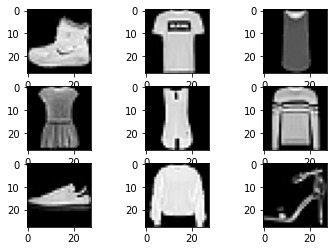

Labels for above displayed images are :
9,0,0,3,0,2,7,2,5,

In [ ]:
#display train images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

print("Labels for above displayed images are :")
for i in range(9):
  print(train_Y[i],end = ",")

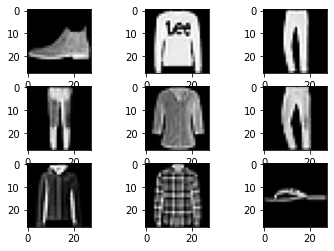

In [ ]:
#display test images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(test_X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
image1 = Image.fromarray(train_X[0])
print(image1.format)
print(image1.mode)
print(image1.size)

image2 = Image.fromarray(test_X[0])
print(image2.format)
print(image2.mode)
print(image2.size)
# F (32-bit floating point pixels)

None
F
(28, 28)
None
F
(28, 28)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train_X,train_Y, test_size=0.4,shuffle=True)

In [ ]:
y_train = np.array(y_train)

**Simple Sequential Model**

In [ ]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),
  keras.layers.Reshape(target_shape=(28, 28, 1)),
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.BatchNormalization(),

  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.BatchNormalization(),
  # keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),

  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
  keras.layers.BatchNormalization(),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.25),

  keras.layers.Flatten(),

  keras.layers.Dense(512,activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.5),

  keras.layers.Dense(128,activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.5),
  
  keras.layers.Dense(10,activation='softmax')
])

# Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# Train the model
# %%capture
history1 = model.fit(X_train, y_train, validation_data = (X_test,y_test),epochs=20,batch_size = 240)

Epoch 1/20
150/150 [==============================] - 3s 20ms/step - loss: 0.1859 - accuracy: 0.9331 - val_loss: 0.2113 - val_accuracy: 0.9259
Epoch 2/20
150/150 [==============================] - 3s 20ms/step - loss: 0.1822 - accuracy: 0.9348 - val_loss: 0.2220 - val_accuracy: 0.9235
Epoch 3/20
150/150 [==============================] - 3s 20ms/step - loss: 0.1785 - accuracy: 0.9357 - val_loss: 0.2284 - val_accuracy: 0.9239
Epoch 4/20
150/150 [==============================] - 3s 20ms/step - loss: 0.1748 - accuracy: 0.9376 - val_loss: 0.2068 - val_accuracy: 0.9285
Epoch 5/20
150/150 [==============================] - 3s 20ms/step - loss: 0.1683 - accuracy: 0.9403 - val_loss: 0.2431 - val_accuracy: 0.9182
Epoch 6/20
150/150 [==============================] - 3s 20ms/step - loss: 0.1674 - accuracy: 0.9396 - val_loss: 0.2045 - val_accuracy: 0.9300
Epoch 7/20
150/150 [==============================] - 3s 20ms/step - loss: 0.1626 - accuracy: 0.9421 - val_loss: 0.2379 - val_accuracy: 0.9205

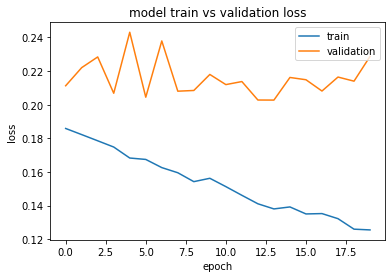

In [ ]:
pyplot.plot(history1.history['loss'])
pyplot.plot(history1.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

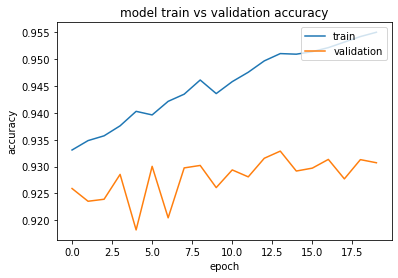

In [ ]:
pyplot.plot(history1.history['accuracy'])
pyplot.plot(history1.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9307083333333334


In [ ]:
y_pred_test=model.predict_classes(test_X)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_final_test,y_pred_test))

In [ ]:
id = list(test_df['id'])

In [ ]:
submission = pd.DataFrame(list(zip(id,y_pred_test)))
submission.columns = ['id','label']

In [ ]:
# submission['label'] = submission['label'].replace([0,1],['fake','real'])

In [ ]:
submission.to_csv("answer.csv", header = True, sep = ",", index = False)